In [1]:
%load_ext autoreload
%autoreload 2

Trying to load cuda, but it is not available
no cuda? True
Found 233 sample images;  187  to train 46 to test


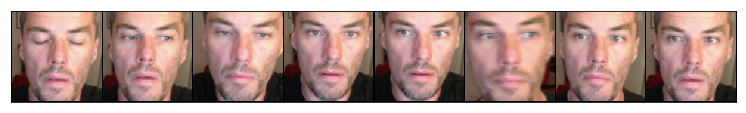

In [2]:
%matplotlib inline
from gaze import init, Data

args = init(batch_size=8, verbose=1)
#args.batch_size=16
d = Data(args)
fig, ax = d.show()

In [3]:
from gaze import ML

ml = ML(args)
ml.device

cuda? False
no cuda? True
Found 233 sample images;  187  to train 46 to test


device(type='cpu')

## learning the model

In [4]:
from gaze import ML
ml = ML(args)

import os
path = '_Regard.pt'
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.main()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

cuda? False
no cuda? True
Found 233 sample images;  187  to train 46 to test
Loading file _Regard.pt


## running the forward model

In [5]:
for batch_idx, (data, target) in enumerate(ml.dataset.train_loader):
    data, target = data.to(ml.device), target.to(ml.device)
    output = ml.model(data)

## testing the model

In [6]:
Accuracy = ml.test()
print('Accuracy={:.1f}%'.format(Accuracy*100))


Test set: Average loss: 0.0647, Accuracy: 45/46 (97%)

Accuracy=97.8%


In [7]:
data, labels = next(iter(ml.dataset.train_loader))
print(' '.join('%5s' % ml.dataset.dataset.classes[labels[j]] for j in range(ml.args.batch_size)))

right blink blink right right right blink blink


In [8]:
import matplotlib.pyplot as plt
fig, ax = ml.show(only_wrong=True)
plt.show()